<a href="https://colab.research.google.com/github/Shudh1999/CANCER/blob/main/notebook0972d410bd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,LeakyReLU,BatchNormalization
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers import Conv2D, Conv2DTranspose,DepthwiseConv2D
from keras.layers import MaxPooling2D, GlobalMaxPool2D, Concatenate
from keras.layers import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from tqdm import tqdm
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from PIL import Image

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/cancer detection/brain_tumor.zip"

In [ ]:
!unzip "/content/drive/MyDrive/cancer detection/braintumor detection.zip"

In [7]:
im_width = 256
im_height = 256
ids1 = next(os.walk("/content/brain_tumor/images"))[2]
X = np.zeros((len(ids1), im_height, im_width, 1), dtype=np.float32)
y = np.zeros((len(ids1), im_height, im_width, 1), dtype=np.float32)

for n, id_ in tqdm(enumerate(ids1), total=len(ids1)):
    # Corrected paths to include a forward slash before the filename
    img_path = os.path.join("/content/brain_tumor/images", id_)
    mask_path = os.path.join("/content/brain_tumor/masks", id_)

    # Load images
    img = load_img(img_path, color_mode='grayscale')
    x_img = img_to_array(img)
    x_img = resize(x_img, (256, 256, 1), mode='constant', preserve_range=True)

    # Load masks
    mask = img_to_array(load_img(mask_path, color_mode='grayscale'))
    mask = resize(mask, (256, 256, 1), mode='constant', preserve_range=True)

    # Save images and masks
    X[n] = x_img / 255.0
    y[n] = mask / 255.0


100%|██████████| 3064/3064 [01:11<00:00, 42.60it/s]


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3,shuffle=True)


In [9]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x
def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p
def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [10]:
def CNN(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="CNN")
    return model

model = CNN((256,256,1))
model.summary()

Model: "CNN"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['batch_normalization[0][0]'

In [11]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])



In [12]:
history = model.fit(X_train, y_train, batch_size=16, epochs=10)



Epoch 1/10
154/154 [==============================] - 188s 870ms/step - loss: 0.1083 - accuracy: 0.9752
Epoch 2/10
154/154 [==============================] - 126s 821ms/step - loss: 0.0566 - accuracy: 0.9821
Epoch 3/10
154/154 [==============================] - 128s 834ms/step - loss: 0.0443 - accuracy: 0.9835
Epoch 4/10
154/154 [==============================] - 129s 837ms/step - loss: 0.0399 - accuracy: 0.9841
Epoch 5/10
154/154 [==============================] - 130s 844ms/step - loss: 0.0356 - accuracy: 0.9849
Epoch 6/10
154/154 [==============================] - 130s 844ms/step - loss: 0.0324 - accuracy: 0.9855
Epoch 7/10
154/154 [==============================] - 130s 847ms/step - loss: 0.0302 - accuracy: 0.9861
Epoch 8/10
154/154 [==============================] - 130s 847ms/step - loss: 0.0285 - accuracy: 0.9865
Epoch 9/10
154/154 [==============================] - 130s 846ms/step - loss: 0.0260 - accuracy: 0.9872
Epoch 10/10
154/154 [==============================] - 130s 845m

In [13]:
model.save('bestsegmentationmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict masks on test data
y_pred = model.predict(X_test)

# Convert predicted masks to binary values
y_pred_binary = (y_pred > 0.5).astype(np.uint8)
y_test = (y_test > 0.5).astype(np.uint8)

20/20 [==============================] - 37s 799ms/step - loss: 0.0274 - accuracy: 0.9863
Test Accuracy: 0.9863038063049316
20/20 [==============================] - 10s 488ms/step


creating our model

In [15]:
train_data_dir = '/content/braintumor detection/Training'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)


In [16]:
test_data_dir = '/content/braintumor detection/Testing'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)


In [17]:
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 123)

In [26]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [33]:
from tensorflow.keras.models import Sequential
import keras
# model sequential
model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= (224,224,3)),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(4, activation = "softmax")
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_28 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_30 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

In [35]:
model.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])


prepaaring our data through data genrator

In [36]:
#early stoping condition dont want to waste the resources
from keras.callbacks import ModelCheckpoint, EarlyStopping
# early stopping
es=EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 5, verbose=1, mode = 'auto')
# model check point
mc=ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only= True, mode = 'auto')
cd=[es,mc]

model training

In [37]:
history = model.fit(train_gen, epochs= 10, verbose= 1, validation_data= valid_gen, shuffle= False,callbacks=cd)


Epoch 1/10
357/357 [==============================] - ETA: 0s - loss: 1.7031 - accuracy: 0.6371
Epoch 1: val_accuracy improved from -inf to 0.72824, saving model to ./bestmodel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


357/357 [==============================] - 92s 219ms/step - loss: 1.7031 - accuracy: 0.6371 - val_loss: 0.6145 - val_accuracy: 0.7282
Epoch 2/10
357/357 [==============================] - ETA: 0s - loss: 0.4628 - accuracy: 0.8337
Epoch 2: val_accuracy improved from 0.72824 to 0.80305, saving model to ./bestmodel.h5
357/357 [==============================] - 72s 201ms/step - loss: 0.4628 - accuracy: 0.8337 - val_loss: 0.5955 - val_accuracy: 0.8031
Epoch 3/10
357/357 [==============================] - ETA: 0s - loss: 0.2938 - accuracy: 0.9041
Epoch 3: val_accuracy improved from 0.80305 to 0.85649, saving model to ./bestmodel.h5
357/357 [==============================] - 73s 203ms/step - loss: 0.2938 - accuracy: 0.9041 - val_loss: 0.3632 - val_accuracy: 0.8565
Epoch 4/10
357/357 [==============================] - ETA: 0s - loss: 0.1989 - accuracy: 0.9293
Epoch 4: val_accuracy improved from 0.85649 to 0.89771, saving model to ./bestmodel.h5
357/357 [==============================] - 72s 20

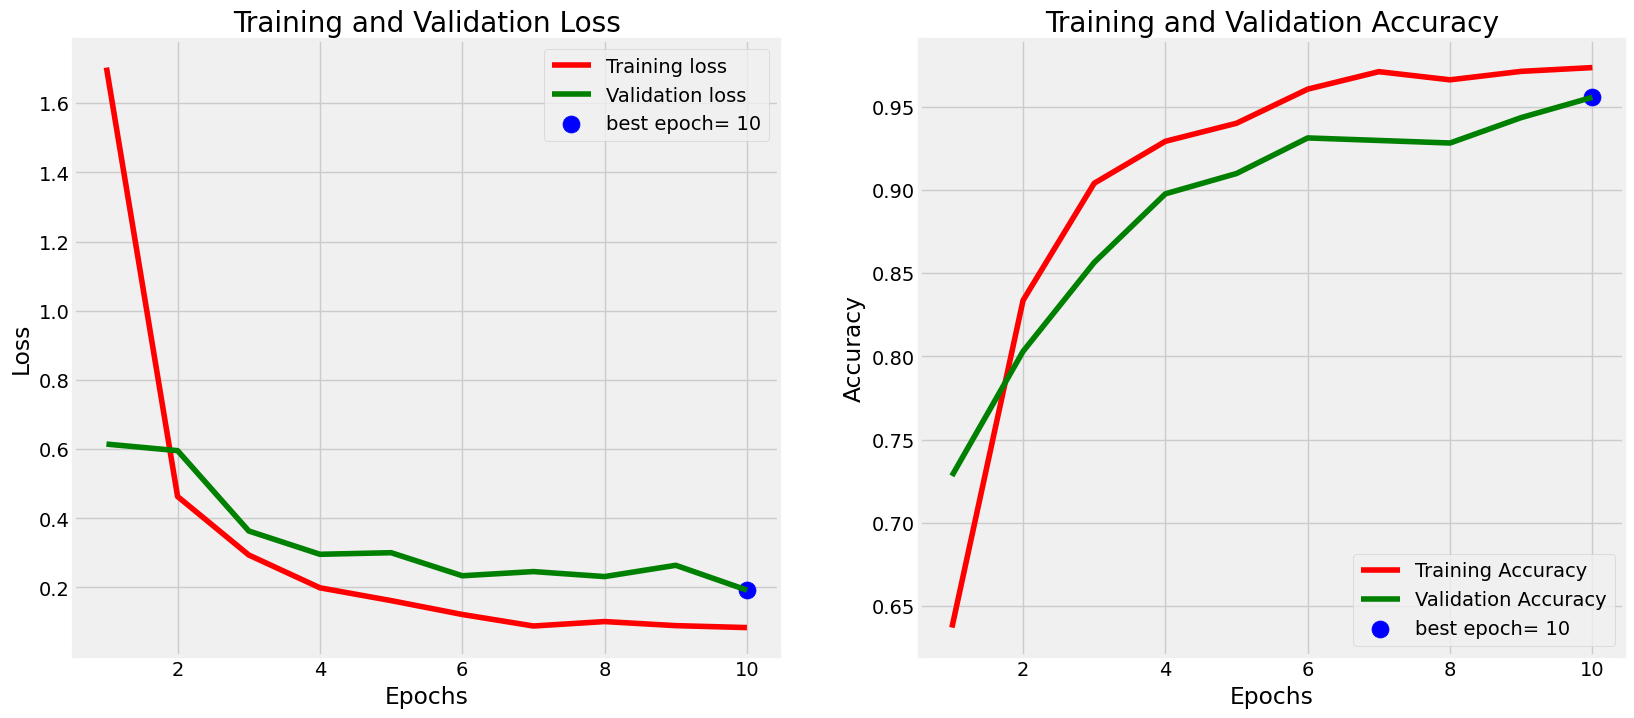

In [38]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [39]:
train_score = model.evaluate(train_gen, verbose= 1)
valid_score = model.evaluate(valid_gen, verbose= 1)
test_score = model.evaluate(test_gen, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

41/41 [==============================] - 3s 65ms/step - loss: 0.1320 - accuracy: 0.9558
Train Loss:  0.02051420882344246
Train Accuracy:  0.9950980544090271
--------------------
Validation Loss:  0.19228552281856537
Validation Accuracy:  0.9557251930236816
--------------------
Test Loss:  0.13196460902690887
Test Accuracy:  0.9557926654815674


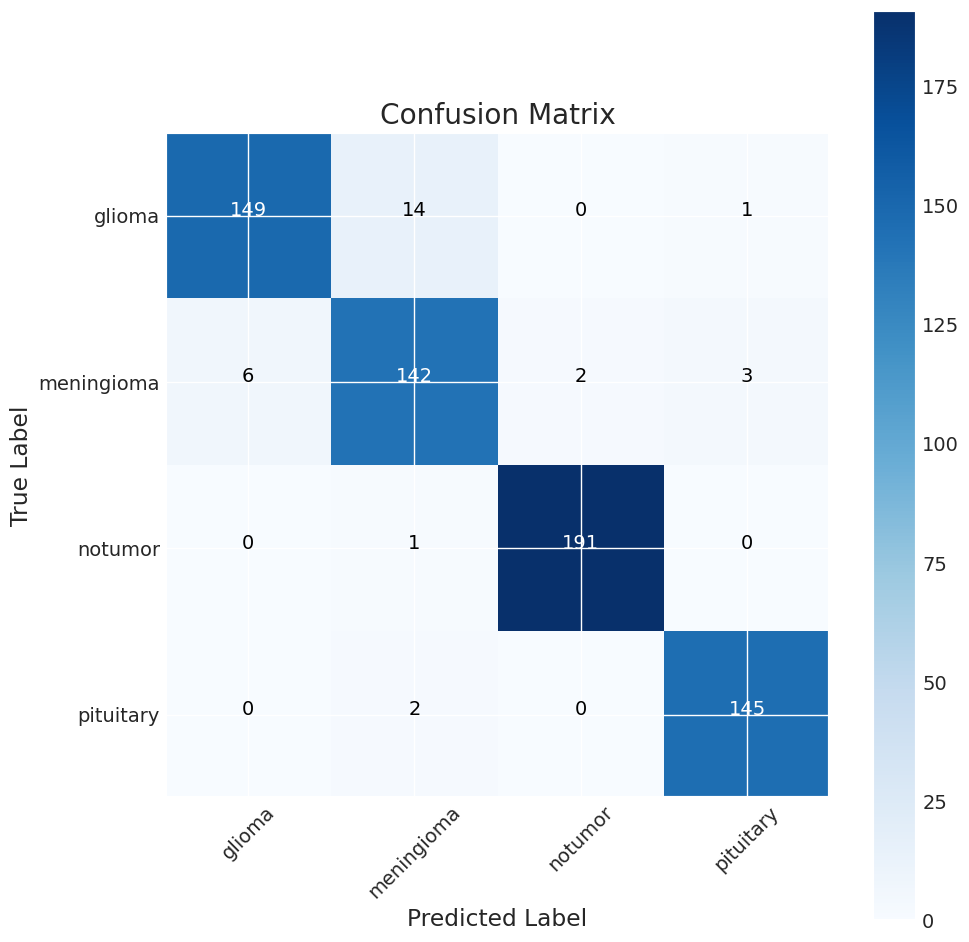

In [47]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
cm

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [48]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      glioma       0.96      0.91      0.93       164
  meningioma       0.89      0.93      0.91       153
     notumor       0.99      0.99      0.99       192
   pituitary       0.97      0.99      0.98       147

    accuracy                           0.96       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.96      0.96      0.96       656



In [49]:
model.save('Brain Tumors.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
loaded_model = tf.keras.models.load_model('/content/Brain Tumors.h5', compile=False)
loaded_model.compile(Adam(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [51]:
image_path = '/content/braintumor detection/Testing/glioma/Te-glTr_0002.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
print(f"{class_labels[np.argmax(predictions)]}")

1/1 [==============================] - 2s 2s/step
Glioma


In [53]:
image_path = '/content/braintumor detection/Testing/pituitary/Te-piTr_0003.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
print(f"{class_labels[np.argmax(predictions)]}")

1/1 [==============================] - 0s 29ms/step
Pituitary
